In [18]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [19]:
Q0 =fits.open('AS1T03_clean_10_Q0.lc')
Q1 =fits.open('AS1T03_clean_10_Q1.lc')
Q2 =fits.open('AS1T03_clean_10_Q2.lc')
Q3 =fits.open('AS1T03_clean_10_Q3.lc')

In [20]:
Q0_time = Q0[1].data['TIME'][400:455]
Q0_rate = Q0[1].data['RATE'][400:455]

Q1_time = Q1[1].data['TIME'][400:455]
Q1_rate = Q1[1].data['RATE'][400:455]

Q2_time = Q2[1].data['TIME'][400:455]
Q2_rate = Q2[1].data['RATE'][400:455]

Q3_time = Q3[1].data['TIME'][400:455]
Q3_rate = Q3[1].data['RATE'][400:455]

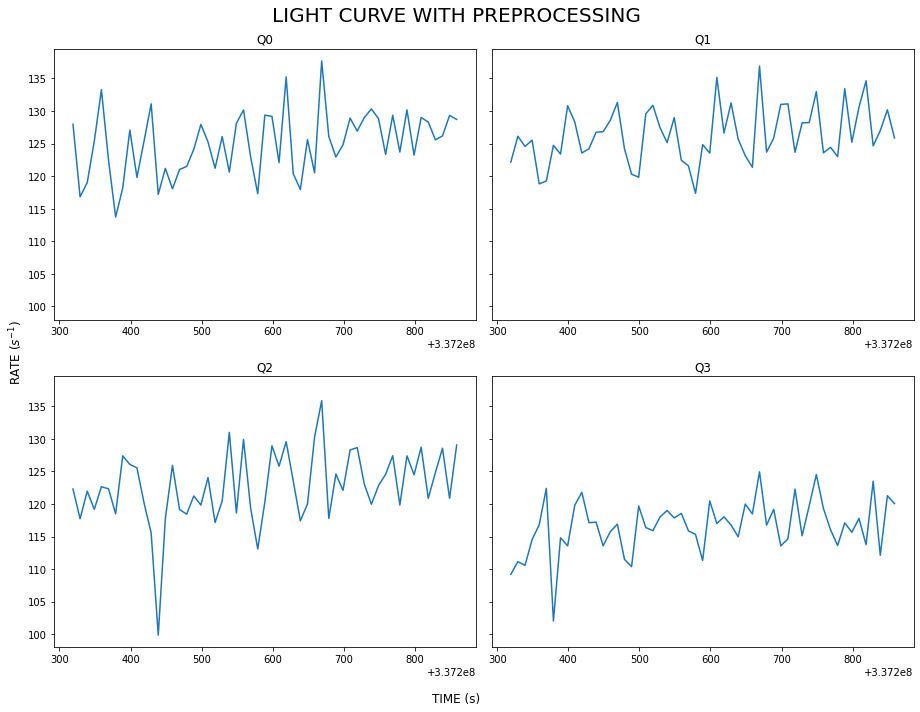

In [23]:
figure, axis = plt.subplots(2, 2, figsize=(13, 10), sharey=True)

figure.suptitle('LIGHT CURVE WITH PREPROCESSING',fontsize=20)
axis[0, 0].plot(Q0_time , Q0_rate)
axis[0, 0].set_title("Q0")

axis[0, 1].plot(Q1_time , Q1_rate)
axis[0, 1].set_title("Q1")

axis[1, 0].plot(Q2_time , Q2_rate)
axis[1, 0].set_title("Q2")

axis[1, 1].plot(Q3_time , Q3_rate)
axis[1, 1].set_title("Q3")

figure.supxlabel('TIME (s)')
figure.supylabel('RATE ($s^{-1}$)')
plt.tight_layout()


### Plot Funciton

In [5]:
def plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
           Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data):
    figure, axis = plt.subplots(4, 2, figsize=(15, 15))
    axis[0, 0].plot(Q0_time, Q0_rate, label = 'Light Curve')
    axis[0, 0].plot(Q0_time, Q0_trend, label = 'Trend')
    axis[0, 0].legend(loc='best')
    axis[0, 0].set_title("Q0")
    axis[0, 1].plot(Q0_time, Q0_detrend_data, label = 'Detrended Curve')
    axis[0, 1].legend(loc='best')
    axis[0, 1].set_title("Q0_detrended")

    axis[1, 0].plot(Q1_time, Q1_rate, label = 'Light Curve')
    axis[1, 0].plot(Q1_time, Q1_trend, label = 'Trend')
    axis[1, 0].legend(loc='best')
    axis[1, 0].set_title("Q0")
    axis[1, 1].plot(Q1_time, Q1_detrend_data, label = 'Detrended Curve')
    axis[1, 1].legend(loc='best')
    axis[1, 1].set_title("Q1_detrended")

    axis[2, 0].plot(Q2_time, Q2_rate, label = 'Light Curve')
    axis[2, 0].plot(Q2_time, Q2_trend, label = 'Trend')
    axis[2, 0].legend(loc='best')
    axis[2, 0].set_title("Q0")
    axis[2, 1].plot(Q2_time, Q2_detrend_data, label = 'Detrended Curve')
    axis[2, 1].legend(loc='best')
    axis[2, 1].set_title("Q2_detrended")

    axis[3, 0].plot(Q3_time, Q3_rate, label = 'Light Curve')
    axis[3, 0].plot(Q3_time, Q3_trend, label = 'Trend')
    axis[3, 0].legend(loc='best')
    axis[3, 0].set_title("Q0")
    axis[3, 1].plot(Q3_time, Q3_detrend_data, label = 'Detrended Curve')
    axis[3, 1].legend(loc='best')
    axis[3, 1].set_title("Q3_detrended")
    plt.savefig("Detrend curve with SAVGOL filter.jpg")
    plt.tight_layout()

### SNR (S-B)/std function

In [6]:
def SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):    
    
    print('(S-B)/std SNR')
    Q0_rate_max_ind = np.argmax(Q0_detrend_data)
    Q0_noise = np.concatenate((Q0_detrend_data[:Q0_rate_max_ind-30],Q0_detrend_data[Q0_rate_max_ind+30:]))
    Q0_mean , Q0_std = np.mean(Q0_noise) , np.std(Q0_noise)
    Q0_SNR = (max(Q0_detrend_data)-Q0_mean)/Q0_std
    print('Q0 SNR = ',Q0_SNR)

    Q1_rate_max_ind = np.argmax(Q1_detrend_data)
    Q1_noise = np.concatenate((Q1_detrend_data[:Q1_rate_max_ind-30],Q1_detrend_data[Q1_rate_max_ind+30:]))
    Q1_mean , Q1_std = np.mean(Q1_noise) , np.std(Q1_noise)
    Q1_SNR = (max(Q1_detrend_data)-Q1_mean)/Q1_std
    print('Q1 SNR = ',Q1_SNR)

    Q2_rate_max_ind = np.argmax(Q2_detrend_data)
    Q2_noise = np.concatenate((Q2_detrend_data[:Q2_rate_max_ind-30],Q2_detrend_data[Q2_rate_max_ind+30:]))
    Q2_mean , Q2_std = np.mean(Q2_noise) , np.std(Q2_noise)
    Q2_SNR = (max(Q2_detrend_data)-Q2_mean)/Q2_std
    print('Q2 SNR = ',Q2_SNR)

    Q3_rate_max_ind = np.argmax(Q3_detrend_data)
    Q3_noise = np.concatenate((Q3_detrend_data[:Q3_rate_max_ind-30],Q3_detrend_data[Q3_rate_max_ind+30:]))
    Q3_mean , Q3_std = np.mean(Q3_noise) , np.std(Q3_noise)
    Q3_SNR = (max(Q3_detrend_data)-Q3_mean)/Q3_std
    print('Q3 SNR = ',Q3_SNR)

### Noise extraction Fucntions

In [7]:
def get_noise_with_mean(rate):
    SA_w_start, SA_w_end = np.where(rate==0)[0][0], np.where(rate==0)[0][-1]
    rate_max_ind = np.argmax(rate)
    GRB_start, GRB_end = rate_max_ind-30, rate_max_ind+30
    noise = np.concatenate([rate[:GRB_start], rate[GRB_end:SA_w_start], rate[SA_w_end:]])
    noise_mean= np.mean(noise)
    noise = np.concatenate([rate[:GRB_start], [noise_mean]*(GRB_end-GRB_start),
                              rate[GRB_end:SA_w_start], [0]*(SA_w_end-SA_w_start),rate[SA_w_end:]])
    return noise

def get_noise(rate0,rate):
    SA_w_start, SA_w_end = np.where(rate0==0)[0][0], np.where(rate0==0)[0][-1]
    rate_max_ind = np.argmax(rate0)
    GRB_start, GRB_end = rate_max_ind-30, rate_max_ind+30
    noise = np.concatenate([rate[:GRB_start], rate[GRB_end:SA_w_start], rate[SA_w_end:]])
    return noise


### Mean Filter

In [8]:
def mean_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_mfilter = [0]*len(Q0_noise)
    windows_size = 40
    for i in range(0,len(Q0_noise),windows_size):
        Q0_mfilter[i:i+windows_size] = [np.mean(Q0_noise[i:i+windows_size])]*windows_size
    Q0_trend=Q0_mfilter[:724]
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_mfilter = [0]*len(Q1_noise)
    for i in range(0,len(Q1_noise),windows_size):
        Q1_mfilter[i:i+windows_size] = [np.mean(Q1_noise[i:i+windows_size])]*windows_size
    Q1_trend=Q1_mfilter[:724]
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_mfilter = [0]*len(Q2_noise)
    for i in range(0,len(Q2_noise),windows_size):
        Q2_mfilter[i:i+windows_size] = [np.mean(Q2_noise[i:i+windows_size])]*windows_size
    Q2_trend=Q2_mfilter[:724]
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_mfilter = [0]*len(Q3_noise)
    for i in range(0,len(Q3_noise),windows_size):
        Q3_mfilter[i:i+windows_size] = [np.mean(Q3_noise[i:i+windows_size])]*windows_size
    Q3_trend=Q3_mfilter[:724]
    Q3_detrend_data = Q3_rate-Q3_trend

    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Median Filter

In [9]:
def median_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_mfilter = [0]*len(Q0_noise)
    windows_size=40
    for i in range(0,len(Q0_noise),windows_size):
        Q0_mfilter[i:i+windows_size] = [np.median(Q0_noise[i:i+windows_size])]*windows_size
    Q0_trend=Q0_mfilter[:724]
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_mfilter = [0]*len(Q1_noise)
    for i in range(0,len(Q1_noise),windows_size):
        Q1_mfilter[i:i+windows_size] = [np.median(Q1_noise[i:i+windows_size])]*windows_size
    Q1_trend=Q1_mfilter[:724]
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_mfilter = [0]*len(Q2_noise)
    for i in range(0,len(Q2_noise),windows_size):
        Q2_mfilter[i:i+windows_size] = [np.median(Q2_noise[i:i+windows_size])]*windows_size
    Q2_trend=Q2_mfilter[:724]
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_mfilter = [0]*len(Q3_noise)
    for i in range(0,len(Q3_noise),windows_size):
        Q3_mfilter[i:i+windows_size] = [np.median(Q3_noise[i:i+windows_size])]*windows_size
    Q3_trend=Q3_mfilter[:724]
    Q3_detrend_data = Q3_rate-Q3_trend

    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Savgol Filter

In [10]:
def savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    print('SAVGOL FILTER')
    window_length = 30
    polyorder=12

    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_trend = signal.savgol_filter(Q0_noise , window_length, polyorder)
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_trend = signal.savgol_filter(Q1_noise , window_length, polyorder)
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_trend = signal.savgol_filter(Q2_noise , window_length, polyorder)
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_trend = signal.savgol_filter(Q3_noise , window_length, polyorder)
    Q3_detrend_data = Q3_rate-Q3_trend
    
    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Gausian SNR

In [11]:
def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):   
    
    print('GAUSSIAN SNR')
    Q0_noise = get_noise(Q0_rate, Q0_detrend_data)
    n, bins = np.histogram(Q0_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q0 SNR = ',abs((max(Q0_detrend_data))/(popt[1]+3*popt[2])))
    
    Q1_noise = get_noise(Q1_rate, Q1_detrend_data)
    n, bins = np.histogram(Q1_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q1 SNR = ',abs((max(Q1_detrend_data))/(popt[1]+3*popt[2])))
    
    Q2_noise = get_noise(Q2_rate, Q2_detrend_data)
    n, bins = np.histogram(Q2_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q2 SNR = ',abs((max(Q2_detrend_data))/(popt[1]+3*popt[2])))
    
    Q3_noise = get_noise(Q3_rate, Q3_detrend_data)
    n, bins = np.histogram(Q3_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q3 SNR = ',abs((max(Q3_detrend_data))/(popt[1]+3*popt[2])))

(S-B)/std SNR
Q0 SNR =  29.659457345792795
Q1 SNR =  25.414908138501083
Q2 SNR =  37.865392563774556
Q3 SNR =  33.61833562377378


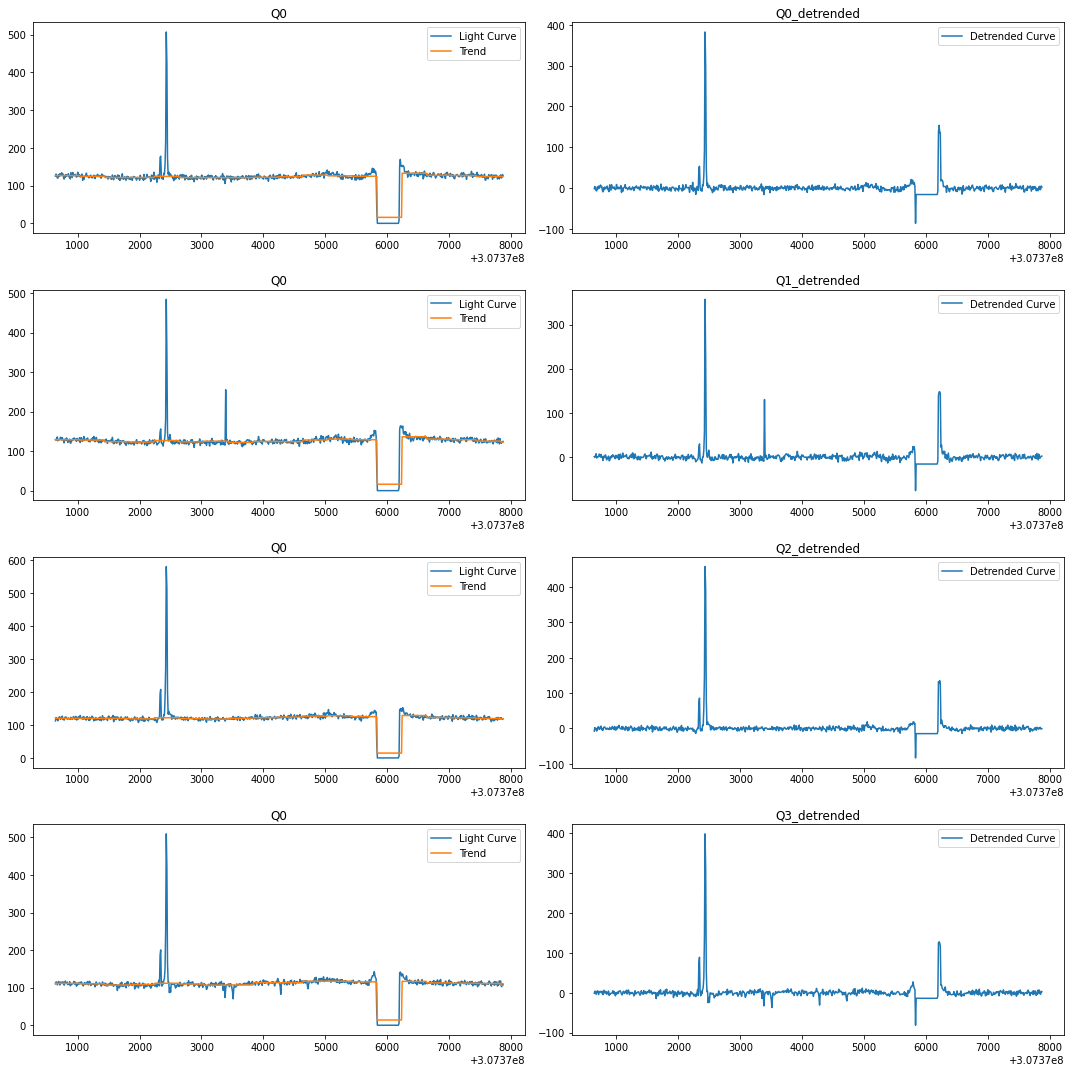

In [12]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = mean_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')
SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER
GAUSSIAN SNR
Q0 SNR =  35.095684690447996
Q1 SNR =  32.689535070400325
Q2 SNR =  42.87288335496882
Q3 SNR =  35.72760778485483


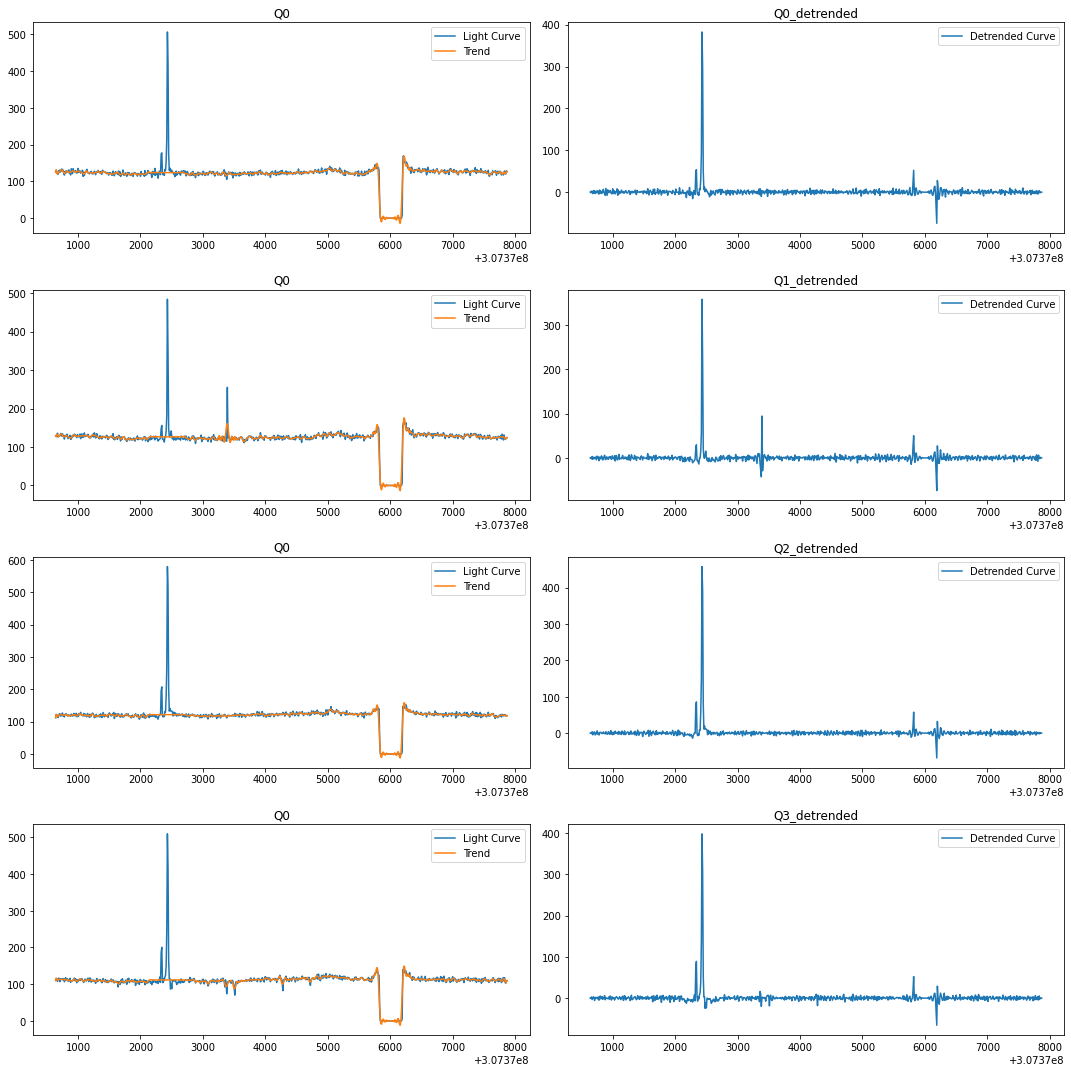

In [13]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')
Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

### Poisson SNR

In [23]:
def poisson_func(x, x0):
    return poisson.pmf(x,x0)

def Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):   
    
    print('Poisson SNR')
    Q0_noise = get_noise(Q0_rate, Q0_detrend_data)
    Q0_noise_off = Q0_noise+100
    n, bins = np.histogram(Q0_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q0_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q0 SNR = ',((max(Q0_detrend_data))/(popt[0]+3*h))*10)
    
    Q1_noise = get_noise(Q1_rate, Q1_detrend_data)
    Q1_noise_off = Q1_noise+100
    n, bins = np.histogram(Q1_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q1_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q1 SNR = ',((max(Q1_detrend_data))/(popt[0]+3*h))*10)
    
    Q2_noise = get_noise(Q2_rate, Q2_detrend_data)
    Q2_noise_off = Q2_noise+100
    n, bins = np.histogram(Q2_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q2_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q2 SNR = ',((max(Q2_detrend_data))/(popt[0]+3*h))*10)
    
    Q3_noise = get_noise(Q3_rate, Q3_detrend_data)
    Q3_noise_off = Q3_noise+100
    n, bins = np.histogram(Q3_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q3 SNR = ',((max(Q3_detrend_data))/(popt[0]+3*h))*10)

SAVGOL FILTER
Poisson SNR
Q0 SNR =  381.9103953361801
Q1 SNR =  356.9119528966897
Q2 SNR =  457.2441011884955
Q3 SNR =  397.20830650342714


/home/rahul/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


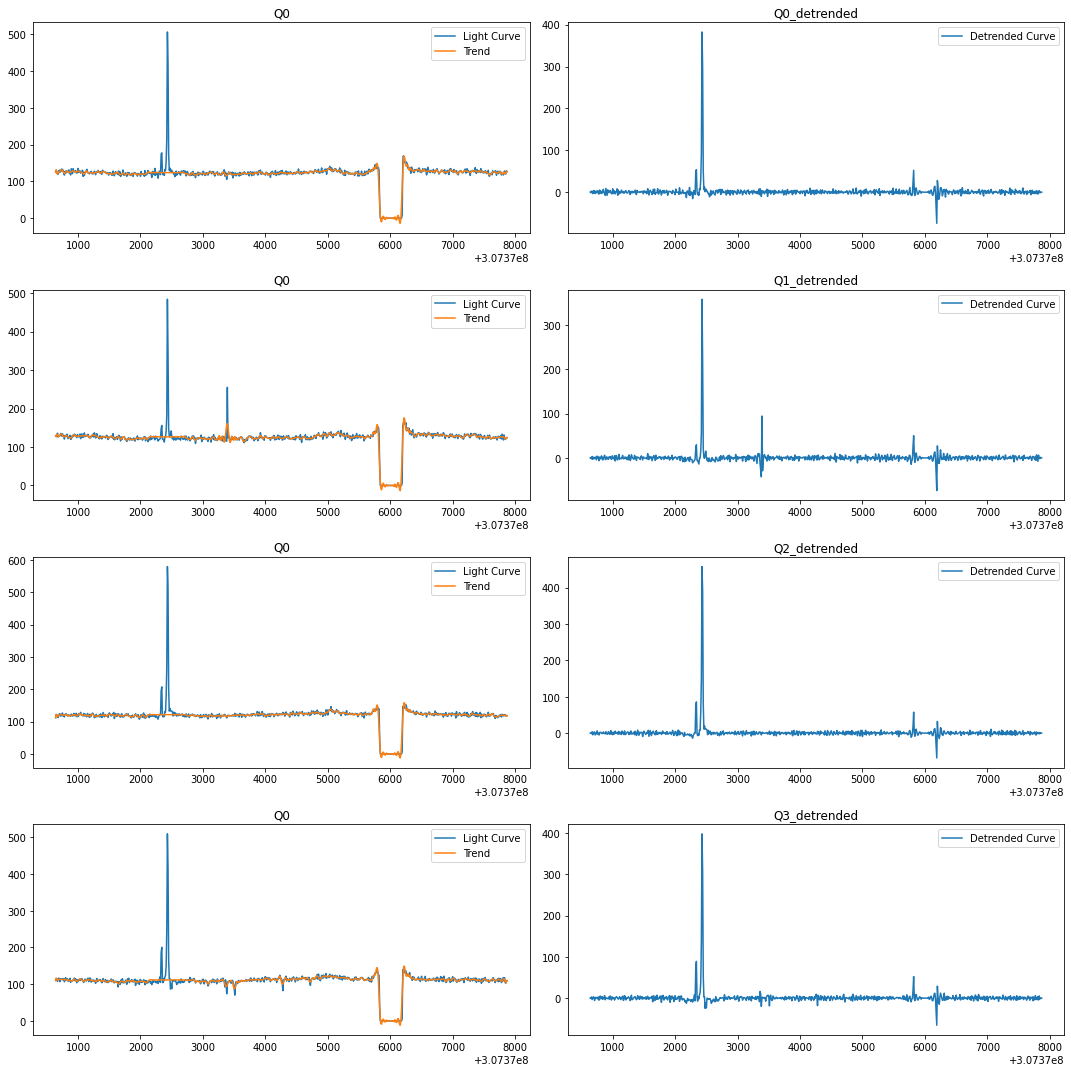

In [21]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')
Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER


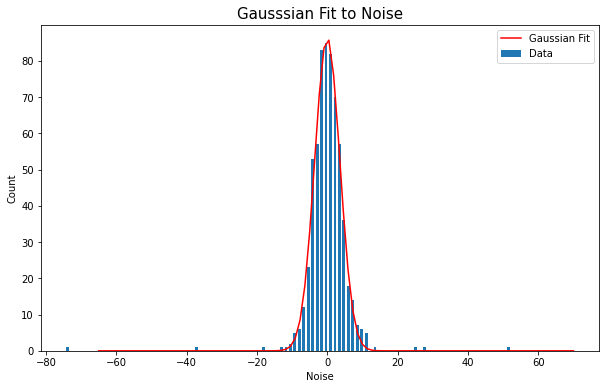

In [16]:
def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
Q0_noise = get_noise(Q0_rate, Q0_detrend_data)
n, bins = np.histogram(Q0_noise, bins=100)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
popt, pcov = curve_fit(gauss_func,bin_centers,n,p0=[np.max(Q0_noise),np.mean(Q0_noise),np.std(Q0_noise)])
xplot = np.linspace(-65,70,len(bin_centers))
plt.figure(figsize=(10,6))
plt.title('Gausssian Fit to Noise',fontsize=15)
plt.bar(bin_centers,n,label='Data')
plt.plot(xplot,gauss_func(xplot,popt[0],popt[1],popt[2]),label='Gaussian Fit',color='r')
plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend(loc='best')
#plt.savefig('Gausssian Fit.jpeg')

SAVGOL FILTER
0.37993840453714467
30.06175024929515


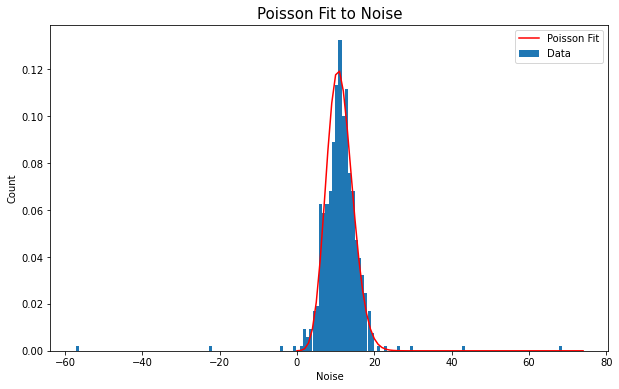

In [17]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,
                                                                                   Q2_rate,Q3_rate,'N')

def poisson_func(x,  x0):
    return poisson.pmf(x,x0)

Q0_noise = get_noise(Q2_rate, Q2_detrend_data)
print((np.mean(Q0_noise))**(1/2))
print(np.std(Q0_noise)**2)
Q0_noise_off = Q0_noise+11
n, binss = np.histogram(Q0_noise_off, bins=150,density=True)
bin_centers = 0.5 * (binss[1:] + binss[:-1])
popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q0_noise_off)])
xplot = np.arange(0,75)
plt.figure(figsize=(10,6))
plt.title('Poisson Fit to Noise',fontsize=15)
plt.bar(bin_centers,n,label='Data')
plt.plot(xplot,poisson_func(xplot,popt[0]),label='Poisson Fit',color='r')
plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend(loc='best')
#plt.savefig('Poisson Fit')

In [25]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,',')
SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)
Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)
Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER
(S-B)/std SNR
Q0 SNR =  67.64787323022672
Q1 SNR =  50.827288522381856
Q2 SNR =  84.02750612049752
Q3 SNR =  73.15143600855396
GAUSSIAN SNR
Q0 SNR =  35.095684690447996
Q1 SNR =  32.689535070400325
Q2 SNR =  42.87288335496882
Q3 SNR =  35.72760778485483
Poisson SNR
Q0 SNR =  38.19103953361801
Q1 SNR =  35.69119528966897
Q2 SNR =  45.72441011884955
Q3 SNR =  39.72083065034271


SAVGOL FILTER
[ -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5
  11.5  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5
  23.5  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5
  35.5  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5
  47.5  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5
  59.5  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5
  71.5  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5
  83.5  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5
  95.5  96.5  97.5  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5
 107.5 108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5
 119.5 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5
 131.5 132.5 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5
 143.5 144.5 145.5 146.5 147.5 148.5 149.5 150.5 151.5 152.5 153.5 154.5
 155.5 156.5 157.5 158.5 159.5 160.5 

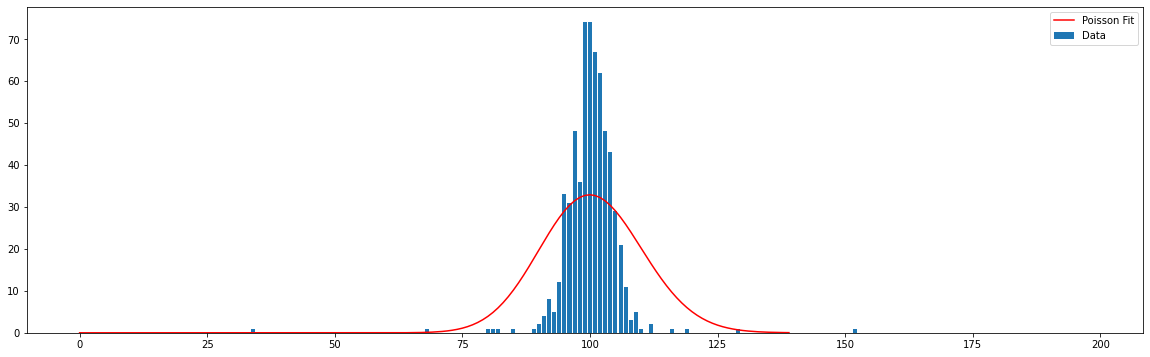

In [24]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,',')
def poisson_fit(k, lamb, c):
    return c*poisson.pmf(k, lamb)
in_bins=200
noise = get_noise(Q3_rate, Q3_detrend_data)

lamb = 100
noise_for_fit = noise+lamb
bins = np.arange(int(lamb - in_bins/2), int(lamb + in_bins/2)) - 0.5
print(bins)
n, bin_edges = np.histogram(noise_for_fit, bins=bins)
bin_center = 0.5 * (bin_edges[1:] + bin_edges[:-1])
print(bin_center)
popt, pcov = curve_fit(poisson_fit, bin_center, n, p0=[np.mean(noise_for_fit), 2000])
xplot = np.arange(0,140)
plt.figure(figsize=(20,6))
plt.bar(bin_center,n,label='Data')
plt.plot(xplot,poisson_fit(xplot,popt[0],popt[1]),label='Poisson Fit',color='r')
plt.legend(loc='best')